## Random Police

Política que escolhe uma das opções disponíveis pelo agente de maneira 100% aleatória.

Neste exemplo a **prob_list** foi definida manualmente, mas na prática essa probabilidade é obtida por meio da observação do comportamento do agente.

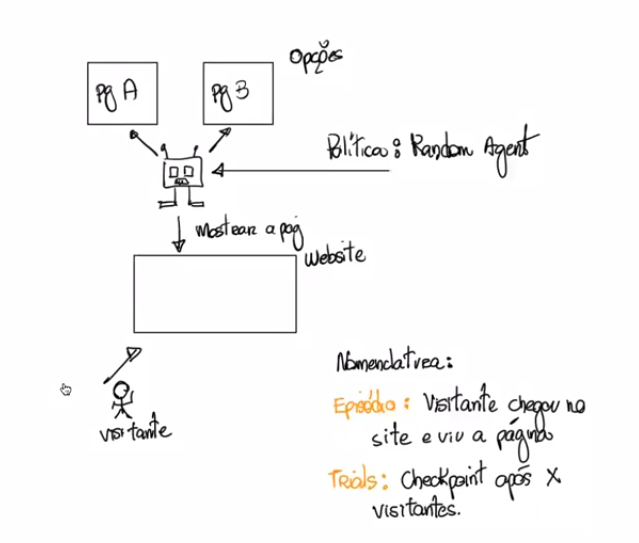

In [1]:
import random
import numpy as np

# criação do agente
class RandomAgent():
    def __init__(self, prob_list):
        self.prob_list = prob_list
    
    def pull(self, bandit_machine):
        if random.random() < self.prob_list[bandit_machine]:
            return 1
        else:
            return 0

In [2]:
# parâmetros do modelo
trials = 1000 # -> quantidade de escolhas feitas pelas pessoas
episodes = 200 # -> "tempo" até a avaliação das tentativas
first_trial_print = 1 # -> printa o primeiro trial
first_episode_print = 1 # -> printa o primeiro episode

# definição do agente
prob_list = [0.3, 0.3, 0.3]
bandit = RandomAgent(prob_list)

# métricas
prob_reward = np.zeros(len(prob_list))
prob_machine_0 = 0
prob_machine_1 = 0
acummulated_reward_array = []
avg_acummulated_reward_array = []

for episode in range(episodes):
    reward_machine = np.zeros(len(prob_list))
    bandit_choose = np.full(len(prob_list), 1e-5)
    accumulated_reward = 0
    for trial in range(trials):
        # escolha do agente
        bandit_machine = random.randint(0, len(prob_list) - 1)
        
        # recompensa do agente
        reward = bandit.pull(bandit_machine)

        # guarda recompensa para avaliação
        reward_machine[bandit_machine] += reward # -> soma do reward de cada máquina 
        bandit_choose[bandit_machine] += 1 # -> quantidade de vezes que a máquina foi escolhida
        accumulated_reward += reward # -> total acumulado de reward por trial
    
    # print first trial
    if first_trial_print:
        print('First trial')
        print(f'Reward machine: {reward_machine}')
        print(f'Machine choosen: {bandit_choose}')
        print(f'Acc reward trial: {accumulated_reward}\n')
        first_trial_print = 0
    
    # cálculo das métricas do episode
    prob_reward += reward_machine / bandit_choose
    acummulated_reward_array.append(accumulated_reward)
    avg_acummulated_reward_array.append(np.mean(accumulated_reward))
    
    # print first episode
    if first_episode_print:
        print('First episode')
        print(f'Prob reward episode: {prob_reward}')
        print(f'Acc reward episode: {acummulated_reward_array}')
        print(f'Avg acc reward episode: {avg_acummulated_reward_array}\n')
        first_episode_print = 0

# cálculo métricas do experimento
probs_machines = [prob_reward[i] / episodes * 100 for i in range(len(prob_list))]
avg_accumulated_reward = np.mean(avg_acummulated_reward_array)
print('Final metric')
for i in range(len(probs_machines)):
    print(f'Prob machine {i}: {probs_machines[i]}%')
print(f'Avg accumulated reward {avg_accumulated_reward}\n')

First trial
Reward machine: [ 99. 107. 102.]
Machine choosen: [333.00001 321.00001 346.00001]
Acc reward trial: 308

First episode
Prob reward episode: [0.29729729 0.33333332 0.29479768]
Acc reward episode: [308]
Avg acc reward episode: [308.0]

Final metric
Prob machine 0: 29.890117499675167%
Prob machine 1: 30.120373207351463%
Prob machine 2: 29.813036669222697%
Avg accumulated reward 299.4



Aqui a recompensa média é proporcional ao valor de probabilidade da escolha das máquinas. Digamos que escolha 10% e 90% fica mais próximo de 500 pq uma delas tem uma probabilidade muito baixa de ser escolhida, já se a escolha for 70% para as 2, o valor da recompensa sobe pra 700 e assim por diante.

## Omniscient Agent

Política que escolhe sempre o agente com maior probabilidade.

In [3]:
import random
import numpy as np

# criação do agente
class OmniscientAgent():
    def __init__(self, prob_list):
        self.prob_list = prob_list
    
    def pull(self, bandit_machine):
        if random.random() < self.prob_list[bandit_machine]:
            return 1
        else:
            return 0

In [4]:
# parâmetros do modelo
trials = 1000 # -> quantidade de escolhas feitas pelas pessoas
episodes = 200 # -> "tempo" até a avaliação das tentativas
first_trial_print = 1 # -> printa o primeiro trial
first_episode_print = 1 # -> printa o primeiro episode

# definição do agente
prob_list = [0.3, 0.4, 0.5]
bandit = OmniscientAgent(prob_list)

# métricas
prob_reward = np.zeros(len(prob_list))
prob_machine_0 = 0
prob_machine_1 = 0
acummulated_reward_array = []
avg_acummulated_reward_array = []

for episode in range(episodes):
    reward_machine = np.zeros(len(prob_list))
    bandit_choose = np.full(len(prob_list), 1e-5)
    accumulated_reward = 0
    for trial in range(trials):
        # escolha do agente
        bandit_machine = np.argmax(prob_list)
        
        # recompensa do agente
        reward = bandit.pull(bandit_machine)

        # guarda recompensa para avaliação
        reward_machine[bandit_machine] += reward # -> soma do reward de cada máquina 
        bandit_choose[bandit_machine] += 1 # -> quantidade de vezes que a máquina foi escolhida
        accumulated_reward += reward # -> total acumulado de reward por trial
    
    # print first trial
    if first_trial_print:
        print('First trial')
        print(f'Reward machine: {reward_machine}')
        print(f'Machine choosen: {bandit_choose}')
        print(f'Acc reward trial: {accumulated_reward}\n')
        first_trial_print = 0
    
    # cálculo das métricas do episode
    prob_reward += reward_machine / bandit_choose
    acummulated_reward_array.append(accumulated_reward)
    avg_acummulated_reward_array.append(np.mean(accumulated_reward))
    
    # print first episode
    if first_episode_print:
        print('First episode')
        print(f'Prob reward episode: {prob_reward}')
        print(f'Acc reward episode: {acummulated_reward_array}')
        print(f'Avg acc reward episode: {avg_acummulated_reward_array}\n')
        first_episode_print = 0

# cálculo métricas do experimento
probs_machines = [prob_reward[i] / episodes * 100 for i in range(len(prob_list))]
avg_accumulated_reward = np.mean(avg_acummulated_reward_array)
print('Final metric')
for i in range(len(probs_machines)):
    print(f'Prob machine {i}: {probs_machines[i]}%')
print(f'Avg accumulated reward {avg_accumulated_reward}\n')

First trial
Reward machine: [  0.   0. 491.]
Machine choosen: [1.00000000e-05 1.00000000e-05 1.00000001e+03]
Acc reward trial: 491

First episode
Prob reward episode: [0.    0.    0.491]
Acc reward episode: [491]
Avg acc reward episode: [491.0]

Final metric
Prob machine 0: 0.0%
Prob machine 1: 0.0%
Prob machine 2: 50.04349949956498%
Avg accumulated reward 500.435



Em teoria esse é o melhor algoritmo, mas é impossível de ser feito já que não sabemos de antemão quais são as melhores probabilidades.

## Greegy Agent

**Observações**:

<p>Puxa todas as alavancas nos primeiros episódios;</p>
<p>Observa a máquina com o maior retorno;</p>
<p>Mantém a máquina de maior retorno até o final da experimentação;</p>

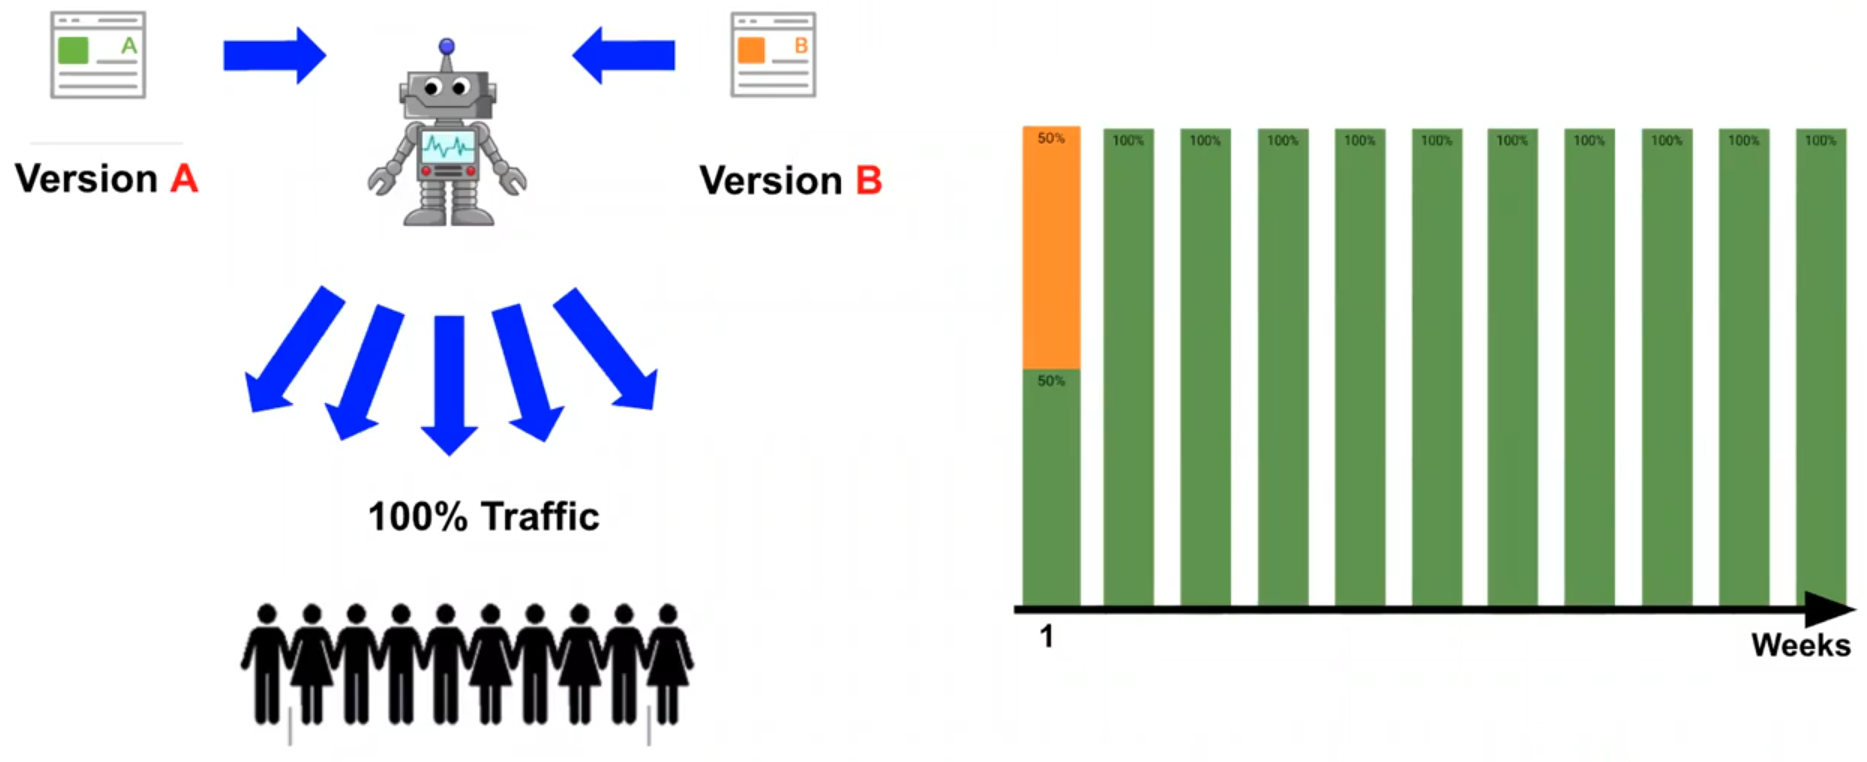

**Resumo:**

Escolhe a versão vencedora dentro de um período muito curto, é arriscado tomar a decisão com somente 1 observação;

O tempo de exploração é muito menor que o de "exploitation";

In [5]:
import random
import numpy as np

# criação do agente
class GreedyAgent():
    def __init__(self, prob_list):
        self.prob_list = prob_list
    
    def pull(self, bandit_machine):
        if random.random() < self.prob_list[bandit_machine]:
            return 1
        else:
            return 0

In [6]:
# parâmetros do modelo
trials = 1000 # -> quantidade de escolhas feitas pelas pessoas
episodes = 200 # -> "tempo" até a avaliação das tentativas
first_trial_print = 1 # -> printa o primeiro trial
first_episode_print = 1 # -> printa o primeiro episode
eps_init = 1

# definição do agente
prob_list = [0.2, 0.35, 0.4, 0.25, 0.3]
bandit = GreedyAgent(prob_list)

# métricas
prob_reward = np.zeros(len(prob_list))
prob_machine_0 = 0
prob_machine_1 = 0
acummulated_reward_array = []
avg_acummulated_reward_array = []

# função para escolha do melhor bandit
def choose_best_machine():
    total_trials = 0
    while 1:
        rewards = np.array([bandit.pull(i) for i in range(len(prob_list))])
        bandits = [1 for i in range(len(prob_list))]
        probs = rewards / bandits
        total_trials += len(prob_list)
        if np.count_nonzero(probs == 1) == 1:
            max_prob = np.where(probs == np.max(probs))[0]
            return total_trials, max_prob[0]  

for episode in range(episodes):
    reward_machine = np.zeros(len(prob_list))
    bandit_choose = np.full(len(prob_list), 1e-5)
    accumulated_reward = 0
    
    if eps_init:
        total_trials, bandit_machine = choose_best_machine()
        print(f'Total users used to get best machine: {total_trials}\n')
        eps_init = 0
    
    for trial in range(trials - total_trials):
        
        # recompensa do agente
        reward = bandit.pull(bandit_machine)
        total_trials = 0
        
        # guarda recompensa para avaliação
        reward_machine[bandit_machine] += reward # -> soma do reward de cada máquina 
        bandit_choose[bandit_machine] += 1 # -> quantidade de vezes que a máquina foi escolhida
        accumulated_reward += reward # -> total acumulado de reward por trial
    
    # print first trial
    if first_trial_print:
        print('First trial')
        print(f'Reward machine: {reward_machine}')
        print(f'Machine choosen: {bandit_choose}')
        print(f'Acc reward trial: {accumulated_reward}\n')
        first_trial_print = 0
    
    # cálculo das métricas do episode
    prob_reward += reward_machine / bandit_choose
    acummulated_reward_array.append(accumulated_reward)
    avg_acummulated_reward_array.append(np.mean(accumulated_reward))
    
    # print first episode
    if first_episode_print:
        print('First episode')
        print(f'Prob reward episode: {prob_reward}')
        print(f'Acc reward episode: {acummulated_reward_array}')
        print(f'Avg acc reward episode: {avg_acummulated_reward_array}\n')
        first_episode_print = 0

# cálculo métricas do experimento
probs_machines = [prob_reward[i] / episodes * 100 for i in range(len(prob_list))]
avg_accumulated_reward = np.mean(avg_acummulated_reward_array)
print('Final metric')
for i in range(len(probs_machines)):
    print(f'Prob machine {i}: {probs_machines[i]}%')
print(f'Avg accumulated reward {avg_accumulated_reward}\n')

Total users used to get best machine: 20

First trial
Reward machine: [191.   0.   0.   0.   0.]
Machine choosen: [9.8000001e+02 1.0000000e-05 1.0000000e-05 1.0000000e-05 1.0000000e-05]
Acc reward trial: 191

First episode
Prob reward episode: [0.19489796 0.         0.         0.         0.        ]
Acc reward episode: [191]
Avg acc reward episode: [191.0]

Final metric
Prob machine 0: 19.984948779722465%
Prob machine 1: 0.0%
Prob machine 2: 0.0%
Prob machine 3: 0.0%
Prob machine 4: 0.0%
Avg accumulated reward 199.83



## Epsilon Greedy Agent

Determina-se o valor de Epsilon;

Alto valor de recompensa;

Bom balanço entreexploração e exploitation;

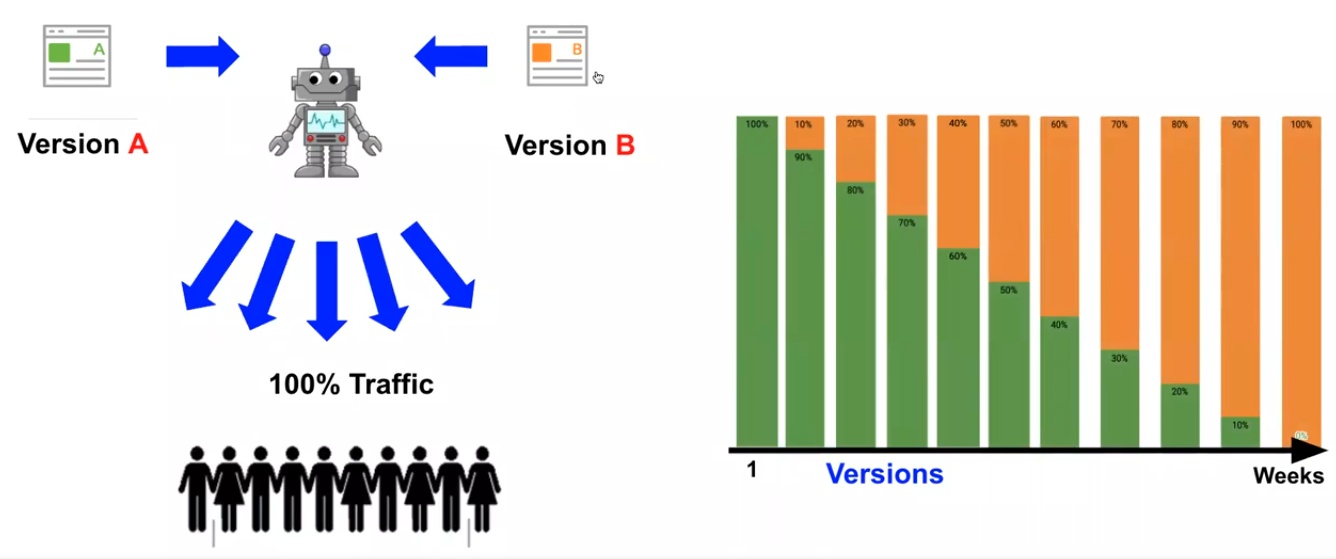

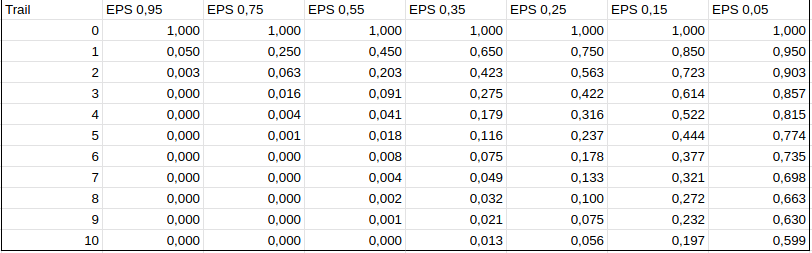

**Os valores contidos na tabela são probabilidades e são usadas para identificar quando escolher entre exploração ou exploitation;**

Gráfico do decaimento para da tabela
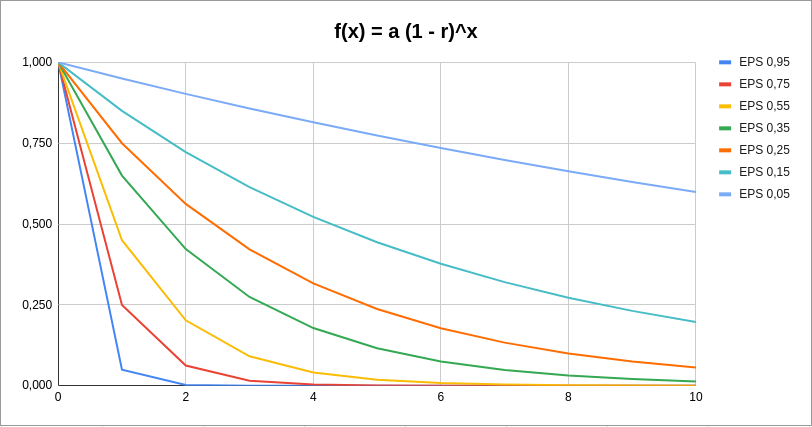

**Resumo:**

A política de Epsilon Greedy usa a fase de exploração para ganhar conhecimento que será utilizado na fase de "exploitação";

A maior dificuldade se dá na escolha do melhor valor de epsilon;

In [7]:
import random
import numpy as np

# criação do agente
class EpsilonGreedyAgent():
    def __init__(self, prob_list):
        self.prob_list = prob_list
    
    def pull(self, bandit_machine):
        if random.random() < self.prob_list[bandit_machine]:
            return 1
        else:
            return 0

In [8]:
# parâmetros do modelo
trials = 1000 # -> quantidade de escolhas feitas pelas pessoas
episodes = 200 # -> "tempo" até a avaliação das tentativas
first_trial_print = 0 # -> printa o primeiro trial
first_episode_print = 0 # -> printa o primeiro episode
decay = 0.45

# definição do agente
prob_list = [0.3, 0.4, 0.5, 0.6]
bandit = EpsilonGreedyAgent(prob_list)

# métricas
prob_reward = np.zeros(len(prob_list))
prob_machine_0 = 0
prob_machine_1 = 0
acummulated_reward_array = []
avg_acummulated_reward_array = []

def calc_linear_decay(r, x):
    return 1 * (1 - r)**x
    
def calc_exp_decay(k, t):
    return 1 * np.exp(-k*t)

def choose_best_machine(rewards, bandits_count):
    probs = rewards / bandits_count
    max_prob = np.where(probs == np.max(probs))[0]
    return max_prob[0]  

# criando valores de decaimento
eps_decay = [calc_exp_decay(decay, i) for i in range(trials)]

for episode in range(episodes):
    reward_machine = np.zeros(len(prob_list))
    bandit_choose = np.full(len(prob_list), 1e-5)
    accumulated_reward = 0

    for trial in range(trials):
        # busca valor de epsilon
        epsilon = eps_decay[trial]
        
        # balanço entre exploração e exploitation
        if epsilon >= 0.5:
            bandit_machine = random.randint(0, len(prob_list) - 1)
        else:
            bandit_machine = choose_best_machine(reward_machine, bandit_choose)
        
        # recompensa do agente
        reward = bandit.pull(bandit_machine)
        
        # guarda recompensa para avaliação
        reward_machine[bandit_machine] += reward # -> soma do reward de cada máquina
        bandit_choose[bandit_machine] += 1 # -> quantidade de vezes que a máquina foi escolhida
        accumulated_reward += reward # -> total acumulado de reward por trial

    # print first trial
    if first_trial_print:
        print('First trial')
        print(f'Reward machine: {reward_machine}')
        print(f'Machine choosen: {bandit_choose}')
        print(f'Acc reward trial: {accumulated_reward}\n')
        first_trial_print = 0
    
    # cálculo das métricas do episode
    prob_reward += reward_machine / bandit_choose
    acummulated_reward_array.append(accumulated_reward)
    avg_acummulated_reward_array.append(np.mean(accumulated_reward))
    
    # print first episode
    if first_episode_print:
        print('First episode')
        print(f'Prob reward episode: {prob_reward}')
        print(f'Acc reward episode: {acummulated_reward_array}')
        print(f'Avg acc reward episode: {avg_acummulated_reward_array}\n')
        first_episode_print = 0

# cálculo métricas do experimento
probs_machines = [prob_reward[i] / episodes * 100 for i in range(len(prob_list))]
avg_accumulated_reward = np.mean(avg_acummulated_reward_array)
print('Final metric')
for i in range(len(probs_machines)):
    print(f'Prob machine {i}: {probs_machines[i]}%')
print(f'Avg accumulated reward {avg_accumulated_reward}\n')

Final metric
Prob machine 0: 13.515701766674718%
Prob machine 1: 5.536677969961639%
Prob machine 2: 11.058667722278688%
Prob machine 3: 21.94585733219217%
Avg accumulated reward 451.82



## Thompson Agent (Bayesiano)

Usa uma distribuição de probabilidade pra escolher o "braço";

Mudança automática entre as fases (exploração e exploitation);

Alto valor de recompensa;

Bom balanço entre exploração e exploitation;

**Distribuição Beta**

**Alpha = sucesso -- Beta= fracasso**
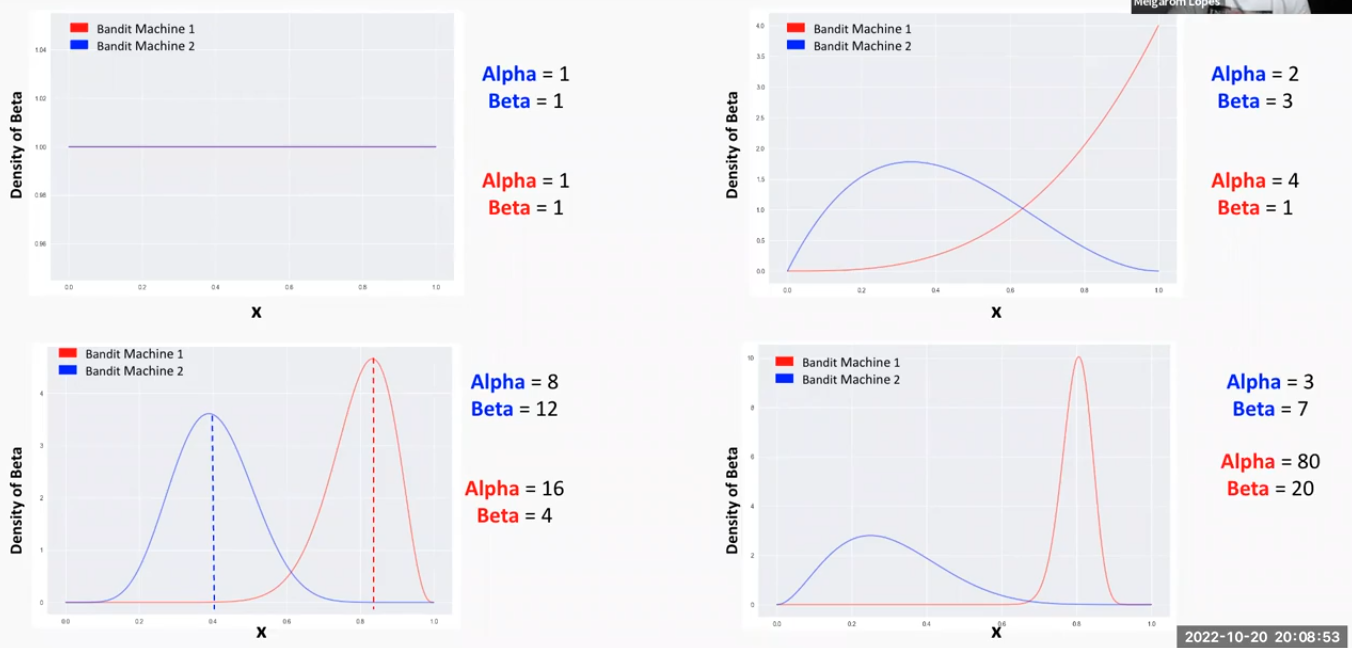



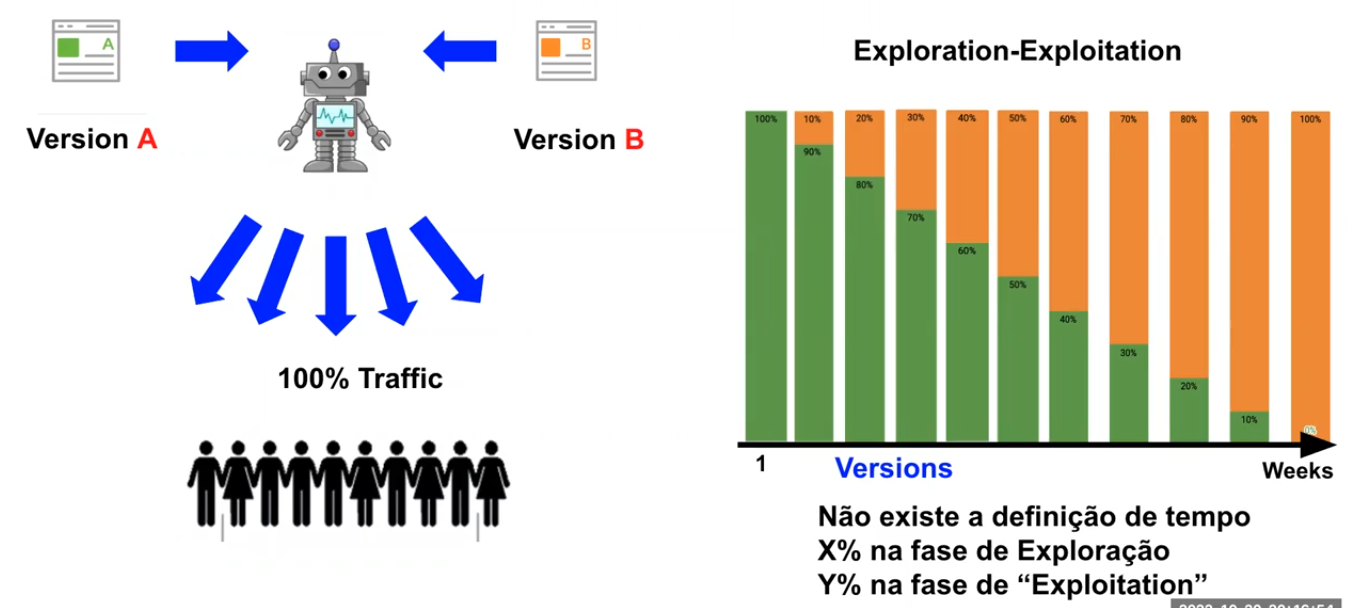

Simulador: https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html

**Resumo:**

Utilizada a distribuição beta para efetuar a troca entre as fases de exploração e "exploitação";

A distribuições se sobrepõe na fase de exploração e se tornam distintas na fase de exploitation;

In [9]:
import random
import numpy as np

# criação do agente
class ThompsonAgent():
    def __init__(self, prob_list):
        self.prob_list = prob_list
    
    def pull(self, bandit_machine):
        if random.random() < self.prob_list[bandit_machine]:
            return 1
        else:
            return 0

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import beta

# parâmetros do modelo
trials = 1000 # -> quantidade de escolhas feitas pelas pessoas
episodes = 200 # -> "tempo" até a avaliação das tentativas
first_trial_print = 0 # -> printa o primeiro trial
first_episode_print = 0 # -> printa o primeiro episode
plot_reward = 0 # -> printa o gráfico de distribuição

# definição do agente
prob_list = [0.3, 0.4, 0.5]
bandit = ThompsonAgent(prob_list)

# métricas
prob_reward = np.zeros(len(prob_list))
prob_machine_0 = 0
prob_machine_1 = 0
acummulated_reward_array = []
avg_acummulated_reward_array = []

def reward_plot(success, failure):
    linestyle = ['-', '--']
    x = np.linspace(0, 1, 1002)[1:-1]
    plt.clf()
    plt.xlim(0, 1)
    plt.ylim(0, 30)
    for a, b, ls in zip(success, failure, linestyle):
        dist = beta(a, b)
        plt.plot(x, dist.pdf(x), ls=ls, c='black', label='- Alpha -- Beta')
        plt.draw()
        plt.pause(0.01)
        plt.legend(loc=0)

def choose_best_machine(success, failure):
    probs = np.random.beta(success, failure)
    return np.argmax(probs) 

for episode in range(episodes):
    success = np.ones(len(prob_list))
    failure = np.full(len(prob_list), 1e-5)
    reward_machine = np.zeros(len(prob_list))
    bandit_choose = np.full(len(prob_list), 1e-5)
    accumulated_reward = 0

    for trial in range(trials):
        # escolha do melhor bandit
        bandit_machine = choose_best_machine(success, failure)
        
        # recompensa do agente
        reward = bandit.pull(bandit_machine)
        
        # incrementando dados de sucesso e falha 
        # para distribuição beta
        if reward:
            success[bandit_machine] += 1
        else:
            failure[bandit_machine] += 1
        
        # plot
        if plot_reward:
            reward_plot(success, failure)
        
        # guarda recompensa para avaliação
        reward_machine[bandit_machine] += reward # -> soma do reward de cada máquina
        bandit_choose[bandit_machine] += 1 # -> quantidade de vezes que a máquina foi escolhida
        accumulated_reward += reward # -> total acumulado de reward por trial

    # print first trial
    if first_trial_print:
        print('First trial')
        print(f'Reward machine: {reward_machine}')
        print(f'Machine choosen: {bandit_choose}')
        print(f'Acc reward trial: {accumulated_reward}\n')
        first_trial_print = 0
    
    # cálculo das métricas do episode
    prob_reward += reward_machine / bandit_choose
    acummulated_reward_array.append(accumulated_reward)
    avg_acummulated_reward_array.append(np.mean(accumulated_reward))
    
    # print first episode
    if first_episode_print:
        print('First episode')
        print(f'Prob reward episode: {prob_reward}')
        print(f'Acc reward episode: {acummulated_reward_array}')
        print(f'Avg acc reward episode: {avg_acummulated_reward_array}\n')
        first_episode_print = 0

# cálculo métricas do experimento
probs_machines = [prob_reward[i] / episodes * 100 for i in range(len(prob_list))]
avg_accumulated_reward = np.mean(avg_acummulated_reward_array)
print('Final metric')
for i in range(len(probs_machines)):
    print(f'Prob machine {i}: {probs_machines[i]}%')
print(f'Avg accumulated reward {avg_accumulated_reward}\n')

Final metric
Prob machine 0: 26.023737572863816%
Prob machine 1: 37.03487102481109%
Prob machine 2: 49.99364683158582%
Avg accumulated reward 480.715

